# Netherlands

## Importations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme(style='white')
energy_table = pd.read_csv('../BDD/energy.csv', sep=';')
energy_table = energy_table[energy_table.Code=='NLD']
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='NLD']
gdp_table.drop('Entity', axis=1, inplace=True)
gdp_table.drop('Code', axis=1, inplace=True)
gdp_table.drop('145446-annotations', axis=1, inplace=True)
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='NLD']
ND_table = pd.merge(gdp_table, pop_table, on=['Year'])
ND_table = pd.merge(ND_table, energy_table, on=['Year'])
ND_table.head()

,Year,GDP per capita,Entity_x,Code_x,"Total population (Gapminder, HYDE & UN)",Entity_y,Code_y,Primary energy consumption (TWh)
0,1800,4184.49,Netherlands,NLD,2254522,Netherlands,NLD,19.636482
1,1801,4110.52,Netherlands,NLD,2258382,Netherlands,NLD,19.636482
2,1802,4337.79,Netherlands,NLD,2262250,Netherlands,NLD,19.636482
3,1803,4244.21,Netherlands,NLD,2266123,Netherlands,NLD,19.636482
4,1804,4445.63,Netherlands,NLD,2270004,Netherlands,NLD,19.636482


In [2]:
pop = ND_table['Total population (Gapminder, HYDE & UN)']
gdp = ND_table['GDP per capita']*pop
energy = ND_table['Primary energy consumption (TWh)']*3.6
year = ND_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)


## Data exploration

### Energy

No handles with labels found to put in legend.


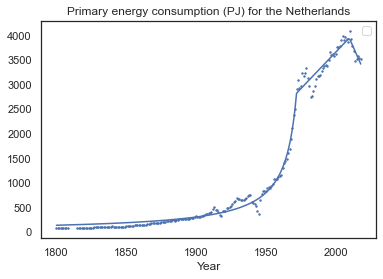

In [3]:
plt.scatter(year, energy, s=2) 
plt.xlabel('Year')
plt.title('Primary energy consumption (PJ) for the Netherlands')
b,c,d,f,x1,x2 = 0.15, 1979, 0.0003, -0.0005, 1972, 2004
b,c,d,f,x1,x2 = reg.hypLinLin(year, energy/10**5, p0=(b,c,d,f,x1,x2), bounds= [-1, 2100])
plt.plot(yplot, 10**5*reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
plt.legend()
ypred=(10**5)* reg.hyp_lin_lin(year,b,c,d,f,x1,x2 )
ND_table['Energy(PJ)-Time(Year)'] = ypred

### GDP

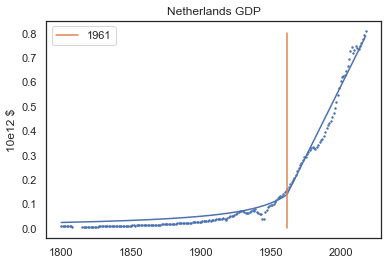

In [4]:
plt.scatter(year, gdp/10**12, s=2)
plt.title('Netherlands GDP')
b,c,d,f,x1,x2 = 12, 1983,0.033,0.025,1971,2009
b,c,d,f,x1,x2 = reg.hypLinLin (year, gdp/10**12, p0=(b,c,d,f,x1,x2), bounds = [-20, 2100])
plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
plt.plot([x1, x1], [0, 0.8], label=str(int(x1)))
plt.legend()
plt.ylabel('10e12 $')
ypred= reg.hyp_lin_lin(year,b,c,d,f,x1,x2 )*(10**12)
ND_table['GDP(2011$)-Time(year)'] =ypred

(0.03253794432, 0.0010195851839999999, 9.999725341796875, 0.00496931767951421, 0.008222235389929047, -0.0026643881195853934)
No handles with labels found to put in legend.


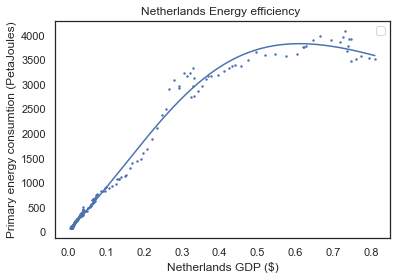

In [5]:
g= gdp/10**12
e = energy/10**5/3.6
gplot = np.linspace(g.min(), g.max(), 200)
plt.scatter(g,e*10**5*3.6, s= 2)
plt.xlabel('Netherlands GDP ($)')
plt.ylabel('Primary energy consumtion (PetaJoules)')
plt.title('Netherlands Energy efficiency ')
G_i, E_i, A, a1, a2, a3 = reg.sReg(g,e, bounds= [-1000, 10**14])
plt.plot(gplot, 3.6*10**5*reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ))
inf_dist = np.array([abs(g[i]-0.3) for i in range(len(g))])
year_infl = year[inf_dist.argmin()]

e_max = reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ).argmax()
max_dist = np.array([abs(g[i]-gplot[e_max]) for i in range(len(g))])
year_max = year[max_dist.argmin()]
 
plt.legend()
ypred= 3.6*reg.s_model(g,G_i, E_i, A, a1, a2, a3 )*(10**5)
ND_table['Energy(PJ)-GDP(10e12$)'] = ypred

No handles with labels found to put in legend.


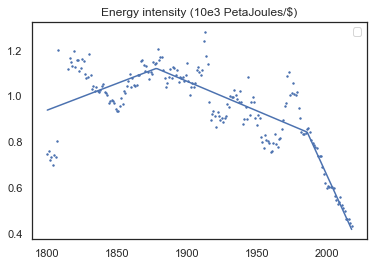

In [6]:
plt.scatter(year, energy/gdp*10**8, s=2)
a,b, c, e, g, x1, x2, x3 = -10, 10, 10, -2*10, -1.5*10, 1850, 1925, 1980
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year, energy/gdp*10**8, p0=(a,b, c, e, g, x1, x2, x3) , bounds = [-2000,2010])
plt.plot(yplot, reg.llll(yplot,a,b, c, e, g, x1, x2, x3 ))

plt.legend()
plt.title('Energy intensity (10e3 PetaJoules/$)')
ypred = reg.llll(year,a,b, c, e, g, x1, x2, x3 )*(10**8)
ND_table['EI(PJ/$)-Time(year)'] = ypred*3.6

Text(0.5, 1.0, 'Variation in (%), Netherlands')

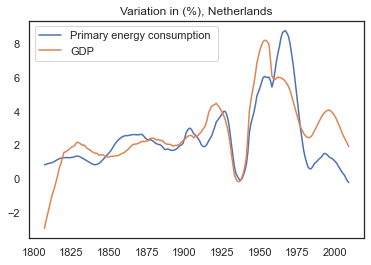

In [7]:
from derivee import growth_rate
x, y=growth_rate(year, energy, s=10, a =15 )
x1,y1 = growth_rate(year, gdp, s=10, a=15)
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%), Netherlands")


In [13]:
ND_table =ND_table.rename(columns={'Entity_x':'Entity', 'Code_x':'Code', 'Primary energy consumption (TWh)':'Primary energy (TWh)','Energy (PetaJoules)':'Primary energy (PJ)', 'Energy (TWh)':'Primary energy (TWh)','Total population (Gapminder, HYDE & UN)' : 'Population' })
ND_table['Primary energy (PJ)']=energy

In [14]:
ND_table.to_csv('../BDD/NLD.csv', index=False)

In [15]:
ND_table.head()

,Year,GDP per capita,Entity,Code,Population,Entity_y,Code_y,Primary energy (TWh),Energy(PJ)-Time(Year),GDP(2011$)-Time(year),Energy(PJ)-GDP(10e12$),EI(PJ/$)-Time(year),Primary energy (PJ)
0,1800,4184.49,Netherlands,NLD,2254522,Netherlands,NLD,19.636482,134.906942,2.440744e+10,121.880615,3.380688e+08,70.691335
1,1801,4110.52,Netherlands,NLD,2258382,Netherlands,NLD,19.636482,135.657976,2.453247e+10,120.727372,3.389082e+08,70.691335
2,1802,4337.79,Netherlands,NLD,2262250,Netherlands,NLD,19.636482,136.417419,2.465878e+10,124.780637,3.397475e+08,70.691335
3,1803,4244.21,Netherlands,NLD,2266123,Netherlands,NLD,19.636482,137.185413,2.478640e+10,123.286637,3.405868e+08,70.691335
4,1804,4445.63,Netherlands,NLD,2270004,Netherlands,NLD,19.636482,137.962104,2.491535e+10,126.912601,3.414262e+08,70.691335
